In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

import time

In [2]:
## grid sampling 1296
data1296 = pd.read_csv('CLEANED_gridsearch_1296.csv')
data1296 = data1296.drop(data1296.columns[0], axis=1)
X_1296 = data1296.drop('density', axis=1)
Y_1296 = data1296['density']
#print(f'{data1296}')
#print(f'{X_1296}')
#print(f'{Y_1296}')

In [27]:
X_train_1296, X_test_1296, Y_train_1296, Y_test_1296 = train_test_split(X_1296, Y_1296, test_size=0.05, random_state=29)

In [4]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
n_restarts = 9

model1296 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=n_restarts, random_state=29)
model1296.fit(X_train, Y_train)

Y_prediction1296_mean, Y_prediction1296_std = model1296.predict(X_test, return_std=True)

rmse1296 = np.sqrt(mean_squared_error(Y_test, Y_prediction1296_mean))
r21296 = r2_score(Y_test, Y_prediction1296_mean)
spearman_r1296 = stats.spearmanr(Y_test, Y_prediction1296_mean)

In [5]:
print(f'y_prediction_mean: {Y_prediction1296_mean}')
print(f'y_prediction_std: {Y_prediction1296_std}')

y_prediction_mean: [637.89052234 878.01116131 634.30026583 590.79528624 664.04353351
 685.26567038 714.73137561 852.29764618 623.2874061  657.10880044
 617.74406206 637.32498024 808.3670393  662.89182402 743.36736628
 647.42857795 737.21716234 819.19466734 877.83580981 762.78973374
 690.41784958 665.59475664 680.99823575 633.10293692 676.39227228
 697.91592099 597.42314225 804.69840388 670.65639871 608.32994093
 809.01724937 540.6959359  635.21677148 678.64202051 756.51488996
 651.09993976 735.88090303 665.96905606 688.98786295 691.94895035
 805.9269697  510.92525631 636.93234811 860.00014468 728.87808938
 658.91070452 606.0505013  632.11730899 630.77573685 356.66120006
 675.32201464 803.66214272 610.32901833 648.74257589 652.68184368
 700.52602642]
y_prediction_std: [  1.36646935  13.78735355   2.85147444   4.25753885   1.707574
  11.91046305   3.43968981   2.71110888   3.81136472  22.91616438
   2.49761962   2.29141809   2.64920648   2.76026524  16.82324091
   1.43718203   2.8735715 

In [10]:
print(f'RMSE: {rmse1296}')
print(f'R2: {r21296}')
print(f'Spearman Rank: {spearman_r1296.statistic}')

RMSE: 20.880321440696687
R2: 0.9444236680170577
Spearman Rank: 0.9531100478468899


In [11]:
## grid sampling 2401
data2401 = pd.read_csv('CLEANED_gridsearch_2401.csv')
data2401 = data2401.drop(data2401.columns[0], axis=1)
X_2401 = data2401.drop('density', axis=1)
Y_2401 = data2401['density']

X_train_2401, X_test_2401, Y_train_2401, Y_test_2401 = train_test_split(X_2401, Y_2401, test_size=0.05, random_state=29)

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
n_restarts = 9

model2401 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=n_restarts, random_state=29)
model2401.fit(X_train_2401, Y_train_2401)

Y_prediction2401_mean, Y_prediction2401_std = model2401.predict(X_test_2401, return_std=True)

rmse2401 = np.sqrt(mean_squared_error(Y_test_2401, Y_prediction2401_mean))
r22401 = r2_score(Y_test_2401, Y_prediction2401_mean)
spearman_r2401 = stats.spearmanr(Y_test_2401, Y_prediction2401_mean)

C:\Users\H-BRS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [12]:
print(f'RMSE: {rmse2401}')
print(f'R2: {r22401}')
print(f'Spearman Rank: {spearman_r2401.statistic}')

RMSE: 66.15448573178519
R2: -0.008554778373008443
Spearman Rank: 0.7291113381001023


In [13]:
## grid sampling Sobol1
dataSobol1 = pd.read_csv('CLEANED_sobolsampling-2048.csv')
dataSobol1 = dataSobol1.drop(dataSobol1.columns[0], axis=1)
X_Sobol1 = dataSobol1.drop('density', axis=1)
Y_Sobol1 = dataSobol1['density']

X_train_Sobol1, X_test_Sobol1, Y_train_Sobol1, Y_test_Sobol1 = train_test_split(X_Sobol1, Y_Sobol1, test_size=0.05, random_state=29)

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
n_restarts = 9

modelSobol1 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=n_restarts, random_state=29)
modelSobol1.fit(X_train_Sobol1, Y_train_Sobol1)

Y_predictionSobol1_mean, Y_predictionSobol1_std = modelSobol1.predict(X_test_Sobol1, return_std=True)

rmseSobol1 = np.sqrt(mean_squared_error(Y_test_Sobol1, Y_predictionSobol1_mean))
r2Sobol1 = r2_score(Y_test_Sobol1, Y_predictionSobol1_mean)
spearman_rSobol1 = stats.spearmanr(Y_test_Sobol1, Y_predictionSobol1_mean)

In [14]:
print(f'RMSE: {rmseSobol1}')
print(f'R2: {r2Sobol1}')
print(f'Spearman Rank: {spearman_rSobol1.statistic}')

RMSE: 13.587668079066054
R2: 0.9854014867038401
Spearman Rank: 0.9818287711124052


In [17]:
## grid sampling Sobol2
dataSobol2 = pd.read_csv('CLEANED_sobolsampling-2048-2.csv')
dataSobol2 = dataSobol2.drop(dataSobol2.columns[0], axis=1)
X_Sobol2 = dataSobol2.drop('density', axis=1)
Y_Sobol2 = dataSobol2['density']

X_train_Sobol2, X_test_Sobol2, Y_train_Sobol2, Y_test_Sobol2 = train_test_split(X_Sobol2, Y_Sobol2, test_size=0.05, random_state=29)

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
n_restarts = 9

modelSobol2 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=n_restarts, random_state=29)
t1 = time.time()
modelSobol2.fit(X_train_Sobol2, Y_train_Sobol2)
dt = time.time() - t1
# 4596.895686388016 s 
# 76.61492810646693 min 
# 1.2769154684411155 hrs

Y_predictionSobol2_mean, Y_predictionSobol2_std = modelSobol2.predict(X_test_Sobol2, return_std=True)

rmseSobol2 = np.sqrt(mean_squared_error(Y_test_Sobol2, Y_predictionSobol2_mean))
r2Sobol2 = r2_score(Y_test_Sobol2, Y_predictionSobol2_mean)
spearman_rSobol2 = stats.spearmanr(Y_test_Sobol2, Y_predictionSobol2_mean)

print(f'time: {dt}s \n      {dt/60}min \n      {dt/3600}hrs')

time: {dt}s 
      {dt/60}min 
      {dt/3600}hrs


In [18]:
print(f'time: {dt}s \n      {dt/60}min \n      {dt/3600}hrs')
print(f'RMSE: {rmseSobol2}')
print(f'R2: {r2Sobol2}')
print(f'Spearman Rank: {spearman_rSobol2.statistic}')

time: 4596.895686388016s 
      76.61492810646693min 
      1.2769154684411155hrs
RMSE: 21.375725126342637
R2: 0.9669312345033938
Spearman Rank: 0.9861442251319132


In [19]:
### import pickle
### Tutorial ###
### # save the model to disk
### filename = 'gpr_model.sav'
### pickle.dump(gpr, open(filename, 'wb')) 
### 
### # load the model from disk
### loaded_model = pickle.load(open(filename, 'rb'))

In [20]:
import pickle
pickle.dump(model1296, open('trained_model1296.sav', 'wb'))
pickle.dump(model2401, open('trained_model2401.sav', 'wb'))
pickle.dump(modelSobol1, open('trained_modelSobol1.sav', 'wb'))
pickle.dump(modelSobol2, open('trained_modelSobol2.sav', 'wb'))

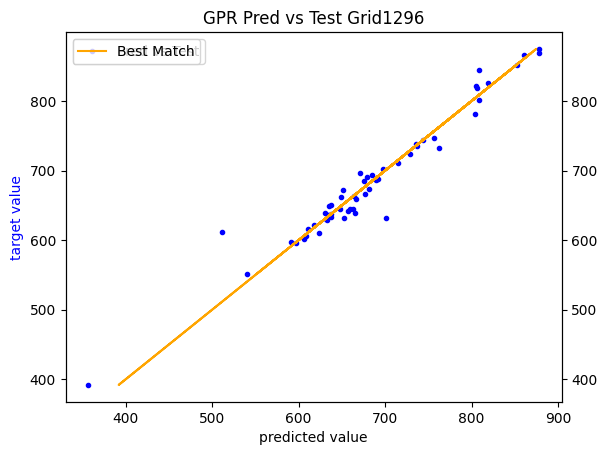

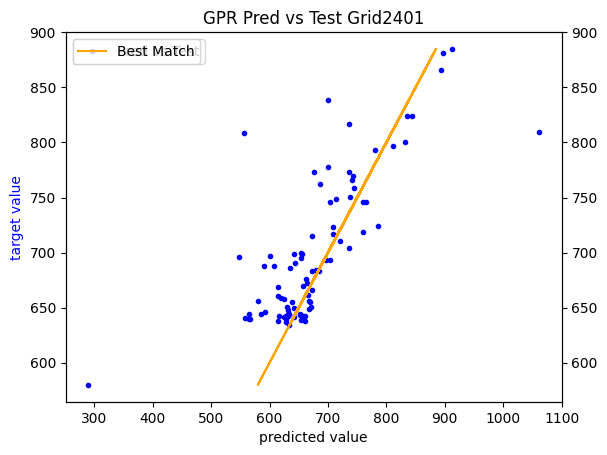

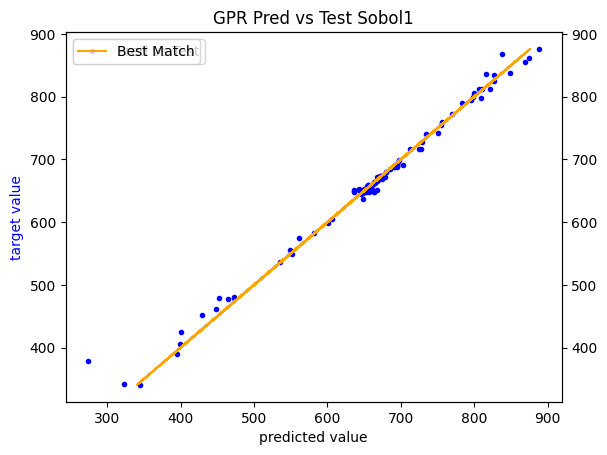

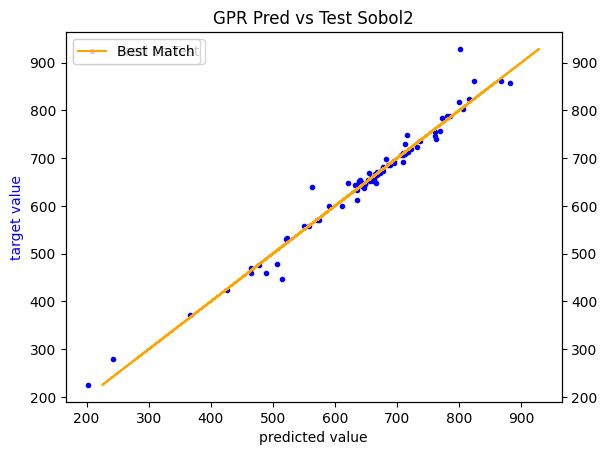

In [31]:
## Grid Sampling 1296
fig, ax1 = plt.subplots()
ax1.plot(Y_prediction1296_mean, Y_test_1296, '.', color='blue', label='Pred vs Test')
ax1.set_xlabel('predicted value')
ax1.set_ylabel('target value', color='blue')
plt.legend()
plt.title('GPR Pred vs Test Grid1296')

ax2 = ax1.twinx()
ax2.plot(Y_test_1296, Y_test_1296, '-', color='orange', label='Best Match')
plt.legend()

plt.show()


## Grid Sampling 2401
fig, ax1 = plt.subplots()
ax1.plot(Y_prediction2401_mean, Y_test_2401, '.', color='blue', label='Pred vs Test')
ax1.set_xlabel('predicted value')
ax1.set_ylabel('target value', color='blue')
plt.legend()
plt.title('GPR Pred vs Test Grid2401')

ax2 = ax1.twinx()
ax2.plot(Y_test_2401, Y_test_2401, '-', color='orange', label='Best Match')
plt.legend()

plt.show()


## Grid Sampling Sobol1
fig, ax1 = plt.subplots()
ax1.plot(Y_predictionSobol1_mean, Y_test_Sobol1, '.', color='blue', label='Pred vs Test')
ax1.set_xlabel('predicted value')
ax1.set_ylabel('target value', color='blue')
plt.legend()
plt.title('GPR Pred vs Test Sobol1')

ax2 = ax1.twinx()
ax2.plot(Y_test_Sobol1, Y_test_Sobol1, '-', color='orange', label='Best Match')
plt.legend()

plt.show()


## Grid Sampling Sobol2
fig, ax1 = plt.subplots()
ax1.plot(Y_predictionSobol2_mean, Y_test_Sobol2, '.', color='blue', label='Pred vs Test')
ax1.set_xlabel('predicted value')
ax1.set_ylabel('target value', color='blue')
plt.legend()
plt.title('GPR Pred vs Test Sobol2')

ax2 = ax1.twinx()
ax2.plot(Y_test_Sobol2, Y_test_Sobol2, '-', color='orange', label='Best Match')
plt.legend()

plt.show()